## 케라스 파이썬 라이브럴를 사용하여 손글씨 숫자 분류 학습

In [ ]:
- 흑백 손글시 숫자 이미지(28x28 픽셀)을 10개의 범주(0~9)로 분류
- MNIST 데이터 셋 사용
- 1980년대 미국 국립표준기술연구소에서 수집한
- 6만 개의 훈련 이미지와 1만 개의 테스트 이미지로 구성
- MNIST 데이터 셋은 넘파이 배열 형태로 케라스에 이미 포함되어 있음

In [30]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [31]:
# 학습 데이터 확인
train_images.shape # 8비트 정수형 3D 텐서임

(60000, 28, 28)

In [32]:
# 축의 개수 확인 : ndim
train_images.ndim  
# 3 : 3D (3차원 : 3개의 축으로 구성)
# 28 x 28 크기의 정수 행렬이 6만 개가 있는 배열

3

In [33]:
len(train_labels)

60000

In [34]:
# 데스트 데이터 확인
test_images.shape

(10000, 28, 28)

In [35]:
# 레이블 확인
train_labels

# dtype=uint8 : 0~255 범위로 양수만 표현이 가능한 2^8개 만큼 표현 가능

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

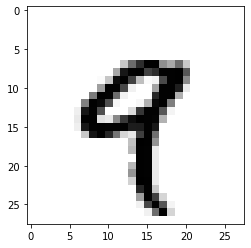

In [36]:
# 다섯 번째 샘플을 맷플롯립 라이브러리를 사용해서 확인
import matplotlib.pyplot as plt

digit  = train_images[4]

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [37]:
# 데이터 전처리 : 2차원으로 변환
# 0과 1사이의 값을 가지는 float32 타입의 
# (60000, 28 * 28) 크기의 2차원 배열로 변경 (60000, 784)
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

# (10000, 28 * 28) 크기의 2차원 배열로 변경 (10000, 784)
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [38]:
train_images.ndim  # 2차원으로 변환됨

2

In [39]:
# 레이블을 범주형으로 인코딩

from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

작업 순서  
(1) 모델 설정  
(2) 컴파일  
(3) 모델 실행 (학습)  
(4) 모델 평가

In [43]:
# 딥러닝 수행

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import tensorflow as tf

tf.random.set_seed(3)

# (1) 모델 설정
# 딥러닝의 구조와 층을 설정하는 단계
network = Sequential() # 일반적으로 modle로 많이 사용
network.add(Dense(512, activation='relu', input_shape=(28*28,)))
network.add(Dense(10, activation='softmax'))

# (2) 컴파일 : loss, optimizer, metrics 설정 단계 
network.compile(optimizer='rmsprop',
               loss = 'categorical_crossentropy',
               metrics=['accuracy'])

# (3) 모델 실행 (학습)
network.fit(train_images, train_labels, epochs=5, batch_size=128)

# (4) 모델 평가
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc : ', test_acc)
print('test_loss : ', test_loss)

# 손실은 점점 작아지고 정확도는 높아짐

Epoch 1/5
469/469 [==============================] - 5s 9ms/step - loss: 0.4304 - accuracy: 0.8742
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 0.1087 - accuracy: 0.9682
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0665 - accuracy: 0.9790
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0503 - accuracy: 0.9846
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0759 - accuracy: 0.9781
test_acc :  0.9781000018119812
test_loss :  0.07594442367553711
